<a href="https://colab.research.google.com/github/acasseleux1-lab/veille-twitter/blob/main/Copy_of_Projet_Final_Emeline_AliceC_Amel_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CONSIGNE


Vous exercez en tant que consultant Data Analyst au sein de « LivreNet », une renommée librairie généraliste en ligne, où vous êtes affilié au département Marketing.

À l'origine, « LivreNet » était une chaîne de librairies physiques avec plusieurs points de vente.

Cependant, face au succès de certains de ses produits et à l'enthousiasme de sa clientèle, elle a pris la décision il y a deux ans d'ouvrir un site de vente en ligne. Vous intervenez maintenant car l'entreprise souhaite évaluer sa performance après deux ans d'activité, analyser ses points forts et ses points faibles, ainsi que comprendre les comportements de sa clientèle, entre autres aspects

##Missions

Vous devrez conduire 2 types d’analyses avec au préalable une analyse exploratoire des données afin de vous approprier les données mais aussi détecter de potentiels incohérences.

1.	Analyse exploratoire et nettoyage des données :

a.	Chaque fichier devra l’objet d’une analyse descriptive selon la nature des variables et vous devrez analyser les résultats
b.	Les fichiers renferment quelques incohérences, vous devrez en trouver à minima 5

2.	Analyse des ventes :

a.	Calculer des indicateurs de ventes et réaliser des graphiques autour du chiffre d’affaires ainsi qu’une évolution
b.	Calculer les tops/flops des produits, analyse de Pareto produit, la répartition par catégorie, et toute autre répartition intéressante

3.	Analyse des clients (calcul de corrélation) :

a.	Le lien entre le genre du client et les catégories de livres achetés b.	Le lien entre le genre d’un client et le montant total des achats
c.	Le lien entre l’âge des clients et la fréquence d’achat
d.	Le lien entre l’âge des clients et la taille du panier moyen
e.	Le lien entre l’âge des clients et la catégorie des livres achetés

4.	Conclure vos analyses avec des recommandations basées sur les analyses ci-dessus.

#Q1 : Analyse exploratoire et nettoyage

##Découverte des données

### Importer les librairies

In [ ]:
import pandas as pd
import numpy as np

products = pd.read_csv(r"/content/products.csv", sep=",", quotechar='"')
customers = pd.read_csv(r"/content/customers.csv", sep=",", quotechar='"')
transactions = pd.read_csv(r"/content/transactions.csv", sep=",", quotechar='"')

###FICHIER : Customers

In [ ]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [ ]:
customers.shape

(8623, 3)

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB




*   Il y a 8623 lignes (vérification doublons dans id_client à faire)
*   Il n'y a pas de valeur null
*   Il y a 3 variables









In [ ]:
customers['birth'].describe()

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


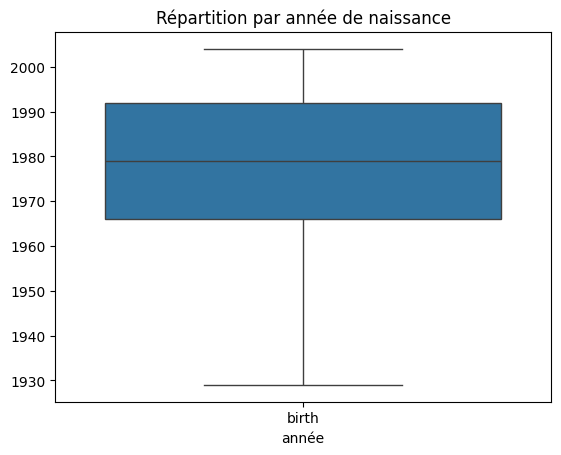

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=customers)
plt.title("Répartition par année de naissance")
plt.xlabel("année")
plt.show()

Résultat cohérent ✅

*   Année de naissance moyenne ≈ 1978
*   Client le plus ancien : 1929
*   Client le plus jeune : 2004


In [ ]:
customers['sex'].value_counts(dropna=False)

,count
sex,
f,4491
m,4132


*   Nombre de femme : 4491
*   Nombre de homme : 4132



In [ ]:
customers['client_id'].nunique()


8623

In [ ]:
customers.shape[0]

8623

Vérification doublons id_client ✅
* Il y 8623 clients

###FICHIER : Products

In [ ]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [ ]:
products.shape

(3287, 3)

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


*   Il y a 3287 lignes (vérification doublons dans id_prod à faire)
*   Il n'y a pas de valeur null
*   Il y a 3 variables

In [ ]:
products['categ'].value_counts(dropna=False)

,count
categ,
0,2309
1,739
2,239


*   3 catégorie (vérification paramètre qui permet la catégorisation à faire)



In [ ]:
products['price'].describe()

,price
count,3287.000000
mean,21.856641
std,29.847908
min,-1.000000
25%,6.990000
50%,13.060000
75%,22.990000
max,300.000000


In [ ]:
(products['price'] <= 0).sum()

np.int64(1)

In [ ]:
products[products['price'] < 0]

,id_prod,price,categ
731,T_0,-1.0,0


❌ Attention anomalie : valeur négative
*  Valeur min à -1
*  Uniquement sur la ligne 731, produit : T_0

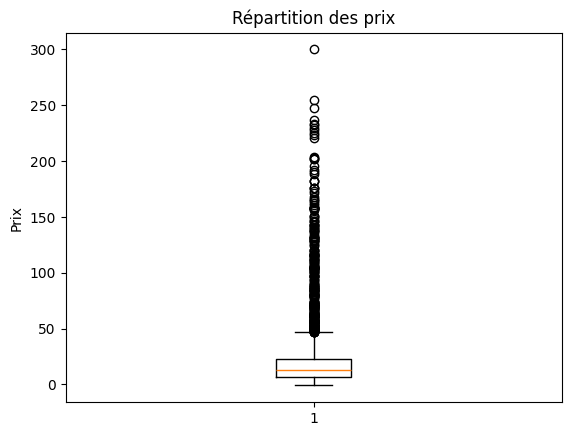

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(products['price'].dropna())
plt.title("Répartition des prix")
plt.ylabel("Prix")
plt.show()

####Prix négatifs / nuls

In [ ]:
products[products['price'] == 0].describe()

,price,categ
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [ ]:
products[products['price'] < 2].describe()

,price,categ
count,111.000000,111.0
mean,1.516216,0.0
std,0.508971,0.0
min,-1.000000,0.0
25%,0.990000,0.0
50%,1.670000,0.0
75%,1.990000,0.0
max,1.990000,0.0


In [ ]:
products[products['price'] < 1].describe()

,price,categ
count,30.000000,30.0
mean,0.858667,0.0
std,0.369704,0.0
min,-1.000000,0.0
25%,0.890000,0.0
50%,0.990000,0.0
75%,0.990000,0.0
max,0.990000,0.0


#### Prix extrêmes

In [ ]:
products[products['price'] < 50].describe()

,price,categ
count,3014.000000,3014.000000
mean,14.438653,0.240876
std,10.215614,0.443683
min,-1.000000,0.000000
25%,6.605000,0.000000
50%,11.990000,0.000000
75%,19.747500,0.000000
max,49.990000,2.000000


In [ ]:
products[products['price'] == 300]

,id_prod,price,categ
947,2_2,300.0,2


* Répartition basse des prix
* Produit bas classification : 0
* Produit élévé classification : 2


In [ ]:
products['id_prod'].nunique()

3287

In [ ]:
products.shape[0]

3287

Vérification doublons id_prod ✅
* Il y 3287 produits

### FICHIER : Transactions

In [ ]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [ ]:
transactions.shape

(679532, 4)

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


*   Il y a 679 532 lignes (vérification doublons dans id_session à faire)
*   Il n'y a pas de valeur null
*   Il y a 4 variables

In [ ]:
transactions["date_parsed"] = pd.to_datetime(transactions["date"],errors="coerce")

In [ ]:
transactions["year"] = transactions["date_parsed"].dt.year
transactions["month"] = transactions["date_parsed"].dt.month
transactions["hour"] = transactions["date_parsed"].dt.hour

In [ ]:
transactions.head()

,id_prod,date,session_id,client_id,date_parsed,year,month,hour
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20 13:21:29.043970,2022.0,5.0,13.0
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02 07:55:19.149409,2022.0,2.0,7.0
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-18 15:44:33.155329,2022.0,6.0,15.0
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24 04:19:29.835891,2021.0,6.0,4.0
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11 08:22:08.194479,2023.0,1.0,8.0


In [ ]:
transactions[transactions["date_parsed"].isna()][["date"]]


,date
3019,test_2021-03-01 02:30:02.237419
5138,test_2021-03-01 02:30:02.237425
9668,test_2021-03-01 02:30:02.237437
10728,test_2021-03-01 02:30:02.237436
15292,test_2021-03-01 02:30:02.237430
...,...
657830,test_2021-03-01 02:30:02.237417
662081,test_2021-03-01 02:30:02.237427
670680,test_2021-03-01 02:30:02.237449
671647,test_2021-03-01 02:30:02.237424


Attention ❌
* 200 lignes date non convertibles car lignes marqués "test" à la même date

In [ ]:
transactions[transactions['session_id'] == "s_0"]

,id_prod,date,session_id,client_id,date_parsed,year,month,hour
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0,NaT,NaN,NaN,NaN
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0,NaT,NaN,NaN,NaN
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1,NaT,NaN,NaN,NaN
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0,NaT,NaN,NaN,NaN
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0,NaT,NaN,NaN,NaN
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1,NaT,NaN,NaN,NaN
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1,NaT,NaN,NaN,NaN
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1,NaT,NaN,NaN,NaN


In [ ]:
transactions[transactions['client_id'] == "ct_0"]

,id_prod,date,session_id,client_id,date_parsed,year,month,hour
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0,NaT,NaN,NaN,NaN
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0,NaT,NaN,NaN,NaN
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0,NaT,NaN,NaN,NaN
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0,NaT,NaN,NaN,NaN
19312,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
633911,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_0,NaT,NaN,NaN,NaN
634523,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_0,NaT,NaN,NaN,NaN
635105,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_0,NaT,NaN,NaN,NaN
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0,NaT,NaN,NaN,NaN


In [ ]:
transactions[transactions['client_id'] == "ct_1"]

,id_prod,date,session_id,client_id,date_parsed,year,month,hour
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1,NaT,NaN,NaN,NaN
23678,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_1,NaT,NaN,NaN,NaN
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1,NaT,NaN,NaN,NaN
35433,T_0,test_2021-03-01 02:30:02.237418,s_0,ct_1,NaT,NaN,NaN,NaN
38646,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_1,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
648864,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1,NaT,NaN,NaN,NaN
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1,NaT,NaN,NaN,NaN
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1,NaT,NaN,NaN,NaN
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1,NaT,NaN,NaN,NaN


Attention ❌
*   Problème dans les sessions : s_0
*   Problème dans les clients : ct_1 et ct_0



In [ ]:
transactions.duplicated().sum()

np.int64(126)

Attention ❌
*   Il y a 126 transactions 100 % identiques



In [ ]:
transactions[transactions.duplicated(keep=False)].sort_values(by=transactions.columns.tolist())


,id_prod,date,session_id,client_id,date_parsed,year,month,hour
91133,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1,NaT,NaN,NaN,NaN
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1,NaT,NaN,NaN,NaN
453857,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1,NaT,NaN,NaN,NaN
548383,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1,NaT,NaN,NaN,NaN
606326,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
312697,T_0,test_2021-03-01 02:30:02.237447,s_0,ct_1,NaT,NaN,NaN,NaN
320833,T_0,test_2021-03-01 02:30:02.237447,s_0,ct_1,NaT,NaN,NaN,NaN
621687,T_0,test_2021-03-01 02:30:02.237447,s_0,ct_1,NaT,NaN,NaN,NaN
19312,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0,NaT,NaN,NaN,NaN


###Croisement : Clients ↔ Transactions

In [ ]:
transactions['client_id'].nunique()

8602

In [ ]:
customers['client_id'].nunique()

8623

Attention ❌
*   Il y a 21 clients qui n'ont jamais fait d'achat, possible nouveau client, inactif, jamais convertis (vérification de lien ou d'incohérence à faire)



In [ ]:
clients_in_transactions = set(transactions['client_id'])
clients_in_customers = set(customers['client_id'])
clients_without_transactions = clients_in_customers - clients_in_transactions
len(clients_without_transactions)
customers[customers['client_id'].isin(clients_without_transactions)].head()

,client_id,sex,birth
801,c_8253,f,2001
2483,c_3789,f,1997
2734,c_4406,f,1998
2769,c_2706,f,1967
2851,c_3443,m,1959


Vérification ✅ pas d'incohérence

###Croisement : Produits ↔ Transactions

In [ ]:
products_in_transactions = set(transactions['id_prod'])
products_in_catalog = set(products['id_prod'])

products_missing_catalog = products_in_transactions - products_in_catalog
len(products_missing_catalog)

1

In [ ]:
products_missing_catalog

{'0_2245'}

In [ ]:
transactions[transactions['id_prod'].isin(products_missing_catalog)]

,id_prod,date,session_id,client_id,date_parsed,year,month,hour
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,2022-09-23 07:22:38.636773,2022.0,9.0,7.0
10106,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,2022-07-23 09:24:14.133889,2022.0,7.0,9.0
11727,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,2022-12-03 03:26:35.696673,2022.0,12.0,3.0
15675,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,2021-08-16 11:33:25.481411,2021.0,8.0,11.0
16377,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,2022-07-16 05:53:01.627491,2022.0,7.0,5.0
...,...,...,...,...,...,...,...,...
669730,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,2021-08-25 09:06:03.504061,2021.0,8.0,9.0
670682,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,2022-03-06 19:59:19.462288,2022.0,3.0,19.0
671286,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,2022-05-16 11:35:20.319501,2022.0,5.0,11.0
675679,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,2022-02-11 09:05:43.952857,2022.0,2.0,9.0


In [ ]:
products_never_sold = products_in_catalog - products_in_transactions
len(products_never_sold)

21

*   Il y a 1 produit qui apparaît dans les transactions mais n’existe pas dans products, il est listé dans 221 transactions
*   Il y a 21 produits qui n’ont jamais été vendus (corrélation à vérifier)

In [ ]:
products_never_sold_df = products[products['id_prod'].isin(products_never_sold)]
products_never_sold_df


,id_prod,price,categ
184,0_1016,35.06,0
279,0_1780,1.67,0
737,0_1062,20.08,0
794,0_1119,2.99,0
811,0_1014,1.15,0
846,1_0,31.82,1
1031,0_1318,20.92,0
1139,0_1800,22.05,0
1347,0_1645,2.99,0
1505,0_322,2.99,0


In [ ]:
products_never_sold_df['categ'].value_counts()

,count
categ,
0,16
2,3
1,2


In [ ]:
products_never_sold_df['price'].describe()

,price
count,21.000000
mean,37.870476
std,56.619963
min,0.800000
25%,2.990000
50%,22.050000
75%,31.820000
max,220.990000


Vérifié ✅
*   76 % des produits jamais vendus appartiennent à la catégorie 0
*   Il y a une majorité des produits sont peu chers à moyen prix

Rappel : on a trouvé un prix à négatives dans produit, identifiable pas T_0, on croise donc avec transaction

In [ ]:
(transactions['id_prod'] == "T_0").sum()

np.int64(200)

In [ ]:
transactions[transactions['id_prod'] == "T_0"]

,id_prod,date,session_id,client_id,date_parsed,year,month,hour
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0,NaT,NaN,NaN,NaN
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0,NaT,NaN,NaN,NaN
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1,NaT,NaN,NaN,NaN
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0,NaT,NaN,NaN,NaN
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0,NaT,NaN,NaN,NaN
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1,NaT,NaN,NaN,NaN
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1,NaT,NaN,NaN,NaN
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1,NaT,NaN,NaN,NaN


* On retrouve ici les 200 lignes avec l'id_prod "T_0" qui corresponde à des lignes tests
* Toutes les sessions sont date de test et en s_0 et ct_0 comme nous l'avons trouvé avant

##Incohérences ❌

1. 21 clients sont présents dans le fichier client mais n’ont effectué aucune transaction

2. 1 produit apparaît dans les transactions mais n’existe pas dans le catalogue products

3. 21 produits du catalogue n’ont enregistré aucune vente

4. Lignes de test dans le fichier transactions (identifiants et dates)

5. Produit T_0 possède un prix négatif, rendant le calcul du chiffre d’affaires impossible (produit utilisé pour faire les test)

6. 220 transaction où les dates ne sont pas valides et ne peuvent pas être exploitées (produit utilisé dans test)

7. 126 transactions 100 % identiques (doublons parfaits)

##Nettoyage des données 🧹

In [ ]:
customers_clean = customers.copy()
products_clean = products.copy()
transactions_clean = transactions.copy()

Conversion date + suppression dates invalides :

In [ ]:
for col in ["date", "session_id", "client_id", "id_prod"]:
    if col in transactions_clean.columns:
        transactions_clean[col] = transactions_clean[col].astype(str)

before = len(transactions_clean)

mask_test = (
    transactions_clean["date"].str.contains("test", case=False, na=False) |
    transactions_clean["session_id"].str.contains(r"^s_0$", na=False) |
    transactions_clean["id_prod"].str.contains(r"^T_0$", na=False) |
    transactions_clean["client_id"].str.contains(r"^ct_", na=False)
)

nb_test = mask_test.sum()
transactions_clean = transactions_clean.loc[~mask_test].copy()

print("  Lignes test détectées : {nb_test}")

  Lignes test détectées : {nb_test}


Suppression des doublons parfaits

In [ ]:
before = len(transactions_clean)
nb_dups = transactions_clean.duplicated().sum()
transactions_clean = transactions_clean.drop_duplicates().copy()

print("  Doublons détectés : {nb_dups}")

  Doublons détectés : {nb_dups}


Nettoyage des NaN et -1 dans price

In [ ]:
products_clean["price"] = pd.to_numeric(products_clean["price"], errors="coerce")

before = len(products_clean)
nb_price_nan = products_clean["price"].isna().sum()
nb_price_bad = (products_clean["price"] <= 0).sum()

products_clean = products_clean.dropna(subset=["price"]).copy()
products_clean = products_clean.loc[products_clean["price"] > 0].copy()

print("  Prix non numériques -> NaN : {nb_price_nan}")
print("  Prix <= 0 : {nb_price_bad}")

  Prix non numériques -> NaN : {nb_price_nan}
  Prix <= 0 : {nb_price_bad}


Suppression transactions avec produits inexistants

In [ ]:
before = len(transactions_clean)

transactions_clean["id_prod"] = transactions_clean["id_prod"].astype(str).str.strip()
products_clean["id_prod"] = products_clean["id_prod"].astype(str).str.strip()

missing_prod_mask = ~transactions_clean["id_prod"].isin(products_clean["id_prod"])
nb_missing_prod = missing_prod_mask.sum()

transactions_clean = transactions_clean.loc[~missing_prod_mask].copy()

print("  Transactions avec id_prod absent : {nb_missing_prod}")

  Transactions avec id_prod absent : {nb_missing_prod}


Transactions où le client n’existe pas dans customers

In [ ]:
before = len(transactions_clean)

transactions_clean["client_id"] = transactions_clean["client_id"].astype(str).str.strip()
missing_client_mask = ~transactions_clean["client_id"].isin(customers_clean["client_id"])
nb_missing_clients = missing_client_mask.sum()

transactions_clean = transactions_clean.loc[~missing_client_mask].copy()

print("  Transactions avec client_id absent : {nb_missing_clients}")

  Transactions avec client_id absent : {nb_missing_clients}


Data frame final + vérification des NA

In [ ]:
df_final = (transactions_clean.merge(products_clean, on="id_prod", how="inner").merge(customers_clean, on="client_id", how="inner"))

print("df_final shape :", df_final.shape)
print("NA par colonne (top 10):")
print(df_final.isna().sum().sort_values(ascending=False).head(10))

df_final shape : (679111, 12)
NA par colonne (top 10):
id_prod        0
date           0
session_id     0
client_id      0
date_parsed    0
year           0
month          0
hour           0
price          0
categ          0
dtype: int64


# Q2 :Analyse des ventes 📊

###Analyse globale

In [ ]:
df_final['revenue'] = df_final['price']

chiffre_affaires = df_final['revenue'].sum()
print('CA :', chiffre_affaires, '€')

CA : 11853728.68 €


Évolution CA mensuel :


,revenue
year_month,
2021-03,482440.61
2021-04,476109.30
2021-05,492943.47
2021-06,484088.56
2021-07,482835.40


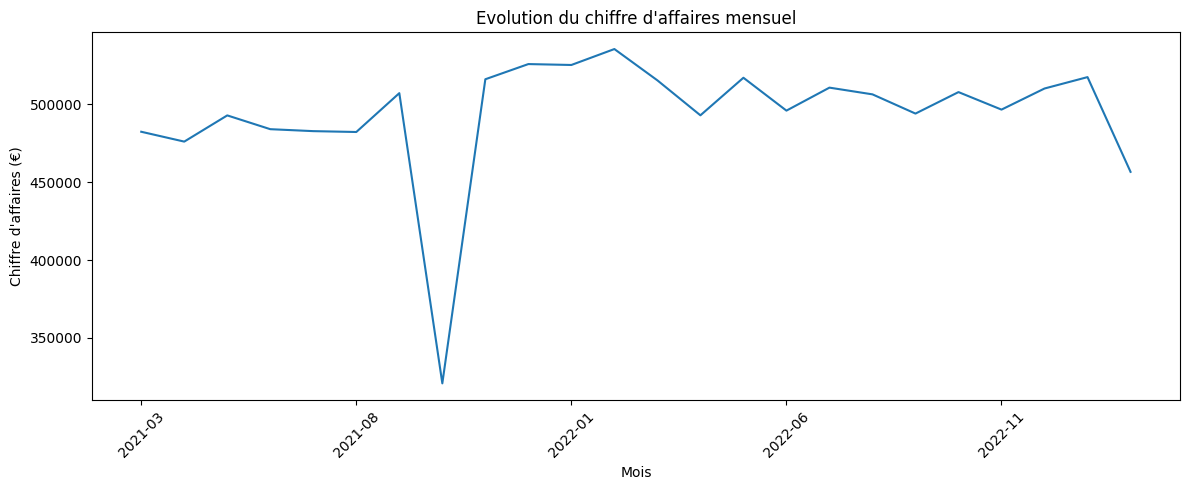

In [ ]:
df_final["date_parsed"] = pd.to_datetime(df_final["date_parsed"], errors="coerce")
df_temp = df_final.dropna(subset=["date_parsed"]).copy()

df_temp["year_month"] = df_temp["date_parsed"].dt.to_period("M").astype(str)

ca_mensuel = (
    df_temp.groupby("year_month")["revenue"]
    .sum()
    .sort_index()
)

print("Évolution CA mensuel :")
display(ca_mensuel.head())

# graphique
plt.figure(figsize=(12,5))
ca_mensuel.plot()
plt.title("Evolution du chiffre d'affaires mensuel")
plt.xlabel("Mois")
plt.ylabel("Chiffre d'affaires (€)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
nb_commandes = len(df_final)
print('Nombre de commande :', nb_commandes)

Nombre de commande : 679111


In [ ]:
panier_moyen = chiffre_affaires / nb_commandes
print('Panier moyen :', panier_moyen, '€')

Panier moyen : 17.454773490637024 €


In [ ]:
clients_actifs = df_final['client_id'].nunique()
print('Nombre de client actifs:',clients_actifs)

Nombre de client actifs: 8600


###Analyse produit

In [ ]:
ca_categ = (df_final.groupby('categ')['revenue'].sum().sort_values(ascending=False))
print('CA par catégorie:',ca_categ)

CA par catégorie: categ
1    4653722.69
0    4419730.97
2    2780275.02
Name: revenue, dtype: float64


In [ ]:
volume_categ = df_final['categ'].value_counts()
valeur_categ = ca_categ

pd.DataFrame({'volume_ventes': volume_categ,'chiffre_affaires': valeur_categ})

,volume_ventes,chiffre_affaires
categ,,
0,415459,4419730.97
1,227169,4653722.69
2,36483,2780275.02


,volume_ventes,chiffre_affaires,part_CA,part_volume
categ,,,,
1,227169,4653722.69,0.392596,0.334509
0,415459,4419730.97,0.372856,0.611769
2,36483,2780275.02,0.234549,0.053722


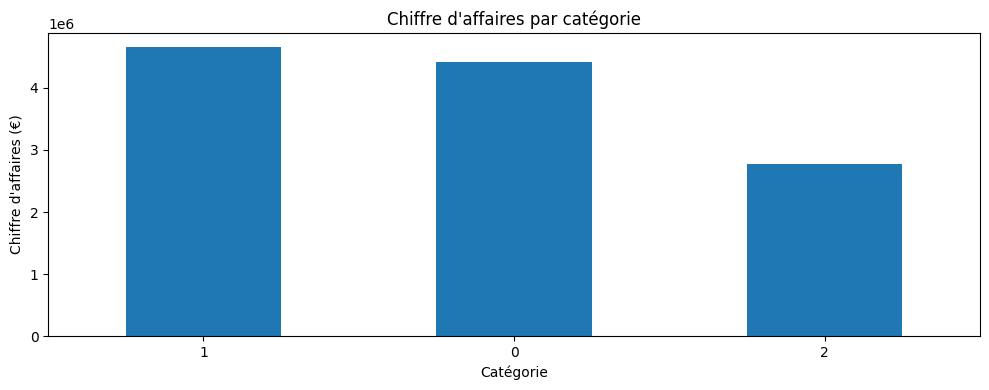

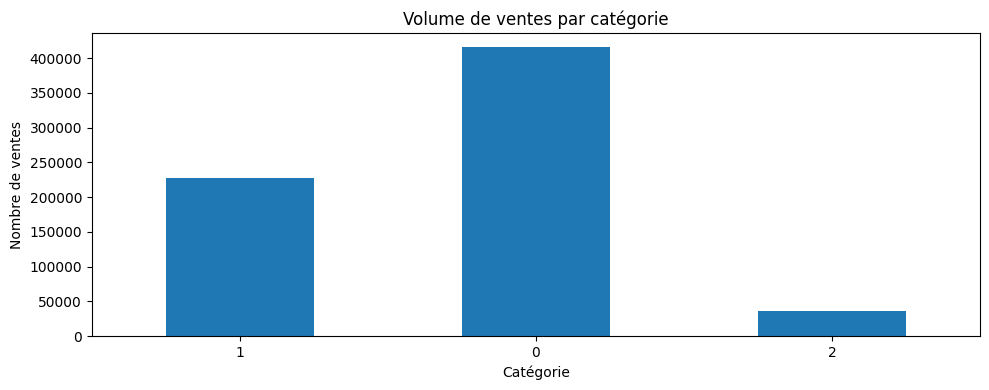

In [ ]:
# Répartition par catégorie : CA + volume + parts (%)

ca_categ = (
    df_final.groupby("categ")["revenue"]
    .sum()
    .sort_values(ascending=False)
)

vol_categ = (
    df_final["categ"]
    .value_counts()
    .reindex(ca_categ.index)
)

df_categ = pd.DataFrame({
    "volume_ventes": vol_categ,
    "chiffre_affaires": ca_categ
})

df_categ["part_CA"] = df_categ["chiffre_affaires"] / df_categ["chiffre_affaires"].sum()
df_categ["part_volume"] = df_categ["volume_ventes"] / df_categ["volume_ventes"].sum()

display(df_categ)

# Graph CA
plt.figure(figsize=(10,4))
df_categ["chiffre_affaires"].plot(kind="bar")
plt.title("Chiffre d'affaires par catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Chiffre d'affaires (€)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Graph volume
plt.figure(figsize=(10,4))
df_categ["volume_ventes"].plot(kind="bar")
plt.title("Volume de ventes par catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Nombre de ventes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
ca_produit = (df_final.groupby('id_prod')['revenue'].sum().sort_values(ascending=False))
ca_cumule = ca_produit.cumsum() / ca_produit.sum()

nb_produits_80 = (ca_cumule <= 0.8).sum()
part_produits = nb_produits_80 / ca_produit.shape[0]

print('Il y a', nb_produits_80, 'produits qui genere 80 % du chiffre d’affaires, soit', part_produits*100, '% des ventes')

Il y a 701 produits qui genere 80 % du chiffre d’affaires, soit 21.470137825421133 % des ventes


Il y a 701 produits qui génèrent ~80% du CA, soit 21.47% des produits.


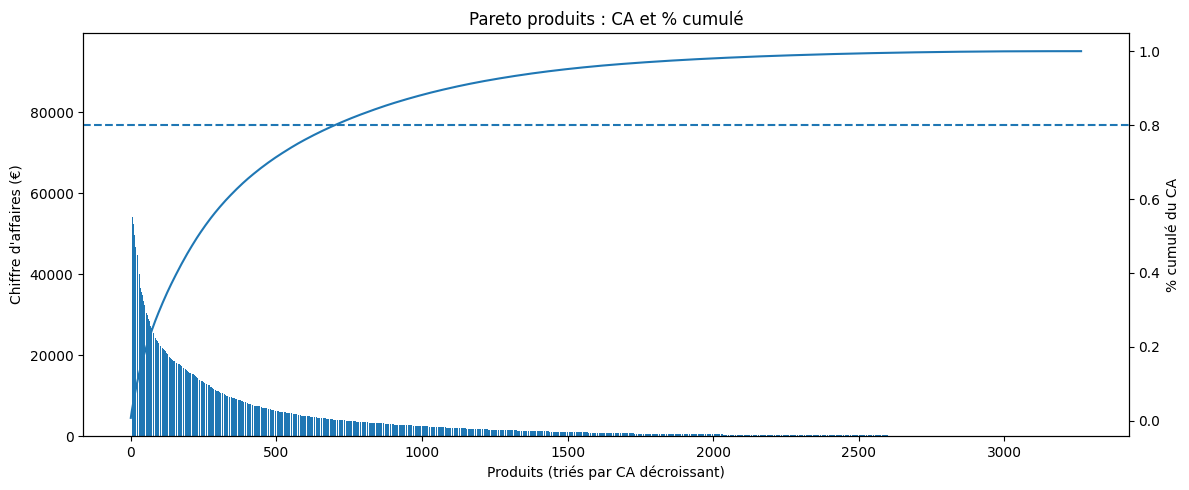

In [ ]:
ca_produit = (
    df_final.groupby("id_prod")["revenue"]
    .sum()
    .sort_values(ascending=False)
)

df_pareto = ca_produit.reset_index()
df_pareto.columns = ["id_prod", "ca"]
df_pareto["ca_cumule"] = df_pareto["ca"].cumsum()
df_pareto["pct_cumule"] = df_pareto["ca_cumule"] / df_pareto["ca"].sum()


nb_produits_80 = (df_pareto["pct_cumule"] <= 0.8).sum()
part_produits = nb_produits_80 / df_pareto.shape[0]

print(
    f"Il y a {nb_produits_80} produits qui génèrent ~80% du CA, soit {part_produits*100:.2f}% des produits."
)

# Graphique Pareto (barres + courbe)
fig, ax1 = plt.subplots(figsize=(12,5))

ax1.bar(range(len(df_pareto)), df_pareto["ca"])
ax1.set_title("Pareto produits : CA et % cumulé")
ax1.set_xlabel("Produits (triés par CA décroissant)")
ax1.set_ylabel("Chiffre d'affaires (€)")

ax2 = ax1.twinx()
ax2.plot(range(len(df_pareto)), df_pareto["pct_cumule"])
ax2.axhline(0.8, linestyle="--")
ax2.set_ylabel("% cumulé du CA")

plt.tight_layout()
plt.show()


Top 10 produits (CA) :


,revenue
id_prod,
2_159,94893.50
2_135,69334.95
2_112,65407.76
2_102,60736.78
2_209,56971.86
1_395,54356.25
1_369,54025.48
2_110,53846.25
2_39,53060.85


Flop 10 produits (CA) :


,revenue
id_prod,
0_1840,2.56
0_898,2.54
0_1498,2.48
0_1728,2.27
0_541,1.99
0_807,1.99
0_1601,1.99
0_1653,1.98
0_1284,1.38


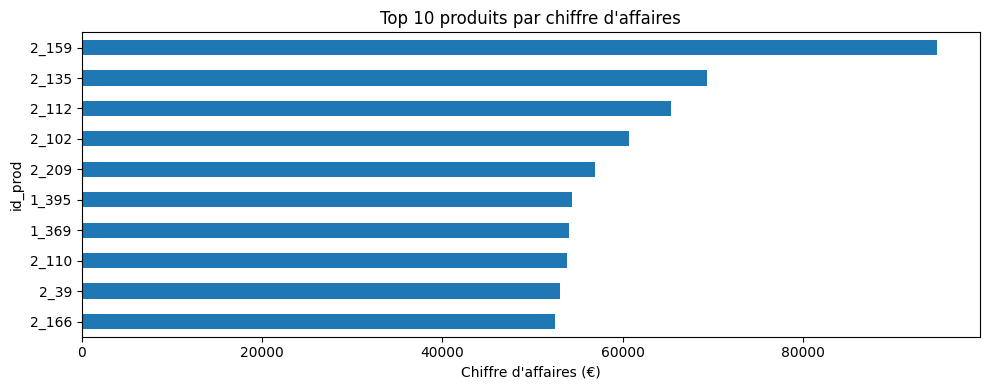

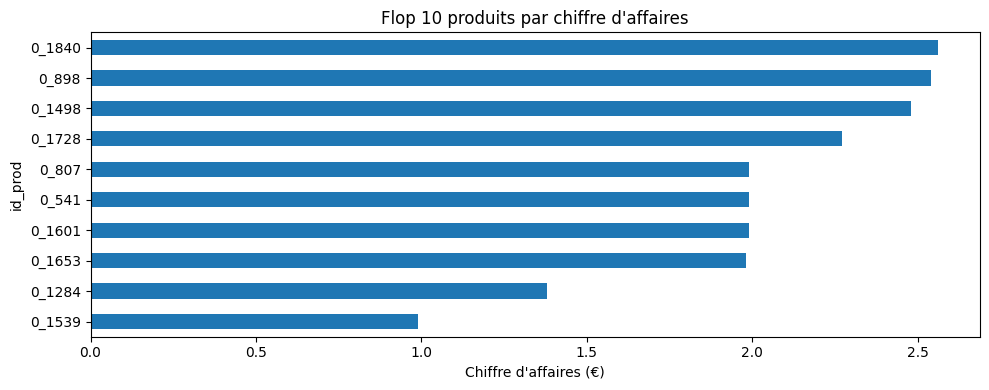

In [ ]:
ca_produit = (
    df_final.groupby("id_prod")["revenue"]
    .sum()
    .sort_values(ascending=False)
)

top_10 = ca_produit.head(10)
flop_10 = ca_produit.tail(10)

print("Top 10 produits (CA) :")
display(top_10)

print("Flop 10 produits (CA) :")
display(flop_10)

# Graphiques rapides
plt.figure(figsize=(10,4))
top_10.sort_values().plot(kind="barh")
plt.title("Top 10 produits par chiffre d'affaires")
plt.xlabel("Chiffre d'affaires (€)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
flop_10.sort_values().plot(kind="barh")
plt.title("Flop 10 produits par chiffre d'affaires")
plt.xlabel("Chiffre d'affaires (€)")
plt.tight_layout()
plt.show()


/tmp/ipython-input-779341795.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_final.groupby("price_bin")["revenue"]


,volume,chiffre_affaires,part_CA
price_bin,,,
0-10,215881,1417475.01,0.119581
10-20,318587,4774982.86,0.402825
20-50,112916,3068127.61,0.258832
50-100,24794,1577660.04,0.133094
100+,6933,1015483.16,0.085668


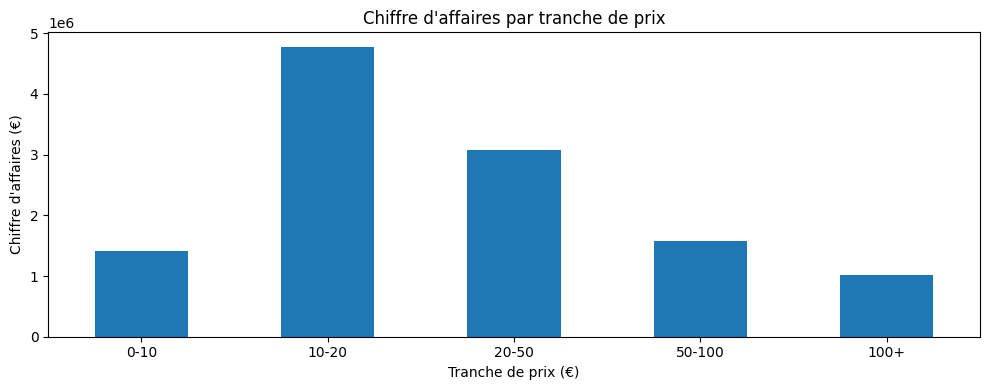

In [ ]:
# Répartition du CA par tranche de prix

df_final["price_bin"] = pd.cut(
    df_final["price"],
    bins=[0, 10, 20, 50, 100, np.inf],
    labels=["0-10", "10-20", "20-50", "50-100", "100+"],
    include_lowest=True
)

ca_par_tranche = (
    df_final.groupby("price_bin")["revenue"]
    .sum()
)

vol_par_tranche = (
    df_final["price_bin"]
    .value_counts()
    .reindex(ca_par_tranche.index)
)

df_price = pd.DataFrame({
    "volume": vol_par_tranche,
    "chiffre_affaires": ca_par_tranche
})
df_price["part_CA"] = df_price["chiffre_affaires"] / df_price["chiffre_affaires"].sum()

display(df_price)

plt.figure(figsize=(10,4))
df_price["chiffre_affaires"].plot(kind="bar")
plt.title("Chiffre d'affaires par tranche de prix")
plt.xlabel("Tranche de prix (€)")
plt.ylabel("Chiffre d'affaires (€)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#Q3 : Analyse des clients

In [ ]:
df_client = df_final.merge(
    customers_clean,
    how="left",
    on="client_id"
)

In [ ]:
df_client.columns


Index(['id_prod', 'date', 'session_id', 'client_id', 'date_parsed', 'year',
       'month', 'hour', 'price', 'categ', 'sex_x', 'birth_x', 'revenue', 'age',
       'price_bin', 'sex_y', 'birth_y'],
      dtype='object')

In [ ]:
genre_categ = (
    df_client
    .groupby(["sex_y", "categ"])
    .size()
    .unstack(fill_value=0)
)

display(genre_categ)

# Répartition en pourcentage
genre_categ_pct = genre_categ.div(genre_categ.sum(axis=1), axis=0)
display(genre_categ_pct)


categ,0,1,2
sex_y,,,
f,206103,114899,17283
m,209356,112270,19200


categ,0,1,2
sex_y,,,
f,0.609258,0.339651,0.051090
m,0.614261,0.329406,0.056334


,revenue
sex_y,
f,1308.257006
m,1454.512388


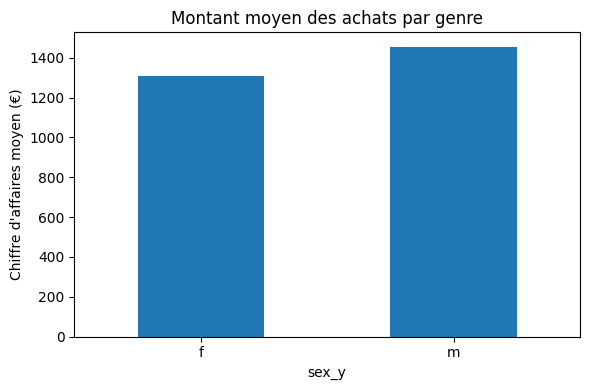

In [ ]:
ca_client = (
    df_client
    .groupby(["client_id", "sex_y"])["revenue"]
    .sum()
    .reset_index()
)

ca_genre = ca_client.groupby("sex_y")["revenue"].mean()

display(ca_genre)

plt.figure(figsize=(6,4))
ca_genre.plot(kind="bar")
plt.title("Montant moyen des achats par genre")
plt.ylabel("Chiffre d'affaires moyen (€)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
freq_client = (
    df_client
    .groupby(["client_id", "age"])
    .size()
    .reset_index(name="frequence_achat")
)

display(freq_client.head())

corr_freq_age = freq_client["age"].corr(freq_client["frequence_achat"])
print(f"Corrélation âge / fréquence d'achat : {corr_freq_age:.2f}")


,client_id,age,frequence_achat
0,c_1,66.0,19
1,c_1,67.0,18
2,c_1,68.0,2
3,c_10,65.0,28
4,c_10,66.0,25


Corrélation âge / fréquence d'achat : -0.00


In [ ]:
panier_client = (
    df_client
    .groupby(["client_id", "age"])["revenue"]
    .mean()
    .reset_index(name="panier_moyen")
)

display(panier_client.head())


corr_panier_age = panier_client["age"].corr(panier_client["panier_moyen"])
print(f"Corrélation âge / panier moyen : {corr_panier_age:.2f}")


,client_id,age,panier_moyen
0,c_1,66.0,15.508421
1,c_1,67.0,12.179444
2,c_1,68.0,22.145000
3,c_10,65.0,20.935000
4,c_10,66.0,24.117200


Corrélation âge / panier moyen : -0.46


In [ ]:
df_client["age_bin"] = pd.cut(
    df_client["age"],
    bins=[0, 25, 35, 45, 55, 100],
    labels=["<25", "25-34", "35-44", "45-54", "55+"]
)

age_categ = (
    df_client
    .groupby(["age_bin", "categ"])
    .size()
    .unstack(fill_value=0)
)

display(age_categ)

age_categ_pct = age_categ.div(age_categ.sum(axis=1), axis=0)
display(age_categ_pct)


/tmp/ipython-input-680115115.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["age_bin", "categ"])


categ,0,1,2
age_bin,,,
<25,11256,20414,22998
25-34,85270,33330,10594
35-44,177748,54711,759
45-54,89967,52772,1058
55+,51218,65942,1074


categ,0,1,2
age_bin,,,
<25,0.205897,0.373418,0.420685
25-34,0.660015,0.257984,0.082001
35-44,0.762154,0.234592,0.003254
45-54,0.625653,0.366990,0.007358
55+,0.433192,0.557725,0.009084


In [ ]:
depense_client = (df_final.groupby('client_id')['revenue'].sum())
depense_client.describe()

,revenue
count,8600.000000
mean,1378.340544
std,5182.542488
min,6.310000
25%,547.630000
50%,1027.020000
75%,1779.500000
max,324033.350000


In [ ]:
frequence_client = (df_final.groupby('client_id').size())
frequence_client.describe()

,0
count,8600.000000
mean,78.966395
std,312.402910
min,1.000000
25%,27.000000
50%,51.000000
75%,96.000000
max,25488.000000


In [ ]:
df_final['age'] = df_final['year'] - df_final['birth']
panier_age = (df_final.groupby('age')['revenue'].mean())
panier_age.describe()

,revenue
count,78.000000
mean,20.025258
std,9.688146
min,12.952077
25%,14.842493
50%,16.774364
75%,16.970550
max,45.960376


In [ ]:
frequence_age = (df_final.groupby('age').size())
frequence_age.describe()

,0
count,78.000000
mean,8706.551282
std,8157.307131
min,23.000000
25%,2110.250000
50%,5589.000000
75%,15250.750000
max,35584.000000


In [ ]:
df_final.groupby('sex')['revenue'].agg(['mean', 'sum', 'count'])

,mean,sum,count
sex,,,
f,17.321735,5859683.13,338285
m,17.586820,5994045.55,340826


#Recommandations

1. Prioriser les produits clés  
Une part limitée du catalogue génère l’essentiel du chiffre d’affaires. Il est recommandé de concentrer les actions marketing, la mise en avant et la gestion des stocks sur ces produits stratégiques.

2. Optimiser le catalogue produits  
Les produits jamais vendus, majoritairement issus de la catégorie 0, doivent faire l’objet d’actions correctives (meilleure visibilité, ajustement de prix) ou être retirés du catalogue à terme.

3. Adapter la stratégie par catégorie  
Les différences entre volume de ventes et contribution au chiffre d’affaires justifient des stratégies distinctes selon les catégories, notamment via le cross-selling ou le positionnement premium.

4. Segmenter les clients par comportement  
Les écarts de dépense et de fréquence d’achat montrent l’intérêt d’une segmentation basée sur les comportements plutôt que sur des critères sociodémographiques seuls.

5. Personnaliser selon l’âge  
Les variations observées selon l’âge suggèrent de proposer des offres et messages adaptés aux différents profils générationnels.

6. Prudence sur le critère du genre  
Les différences entre genres étant limitées, il est préférable de ne pas baser la stratégie marketing uniquement sur ce critère.
